# 1. Data Load and Library Import

In [1]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix
import numpy as np

clmentbisaillon_fake_and_real_news_dataset_path = kagglehub.dataset_download('clmentbisaillon/fake-and-real-news-dataset')

In [2]:
Fake=pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv")
true=pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")

In [3]:
Fake['label']=0

In [4]:
Fake

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [5]:
true['label']=1

In [6]:
true

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


# 2. Data Analysis and Preprocessing

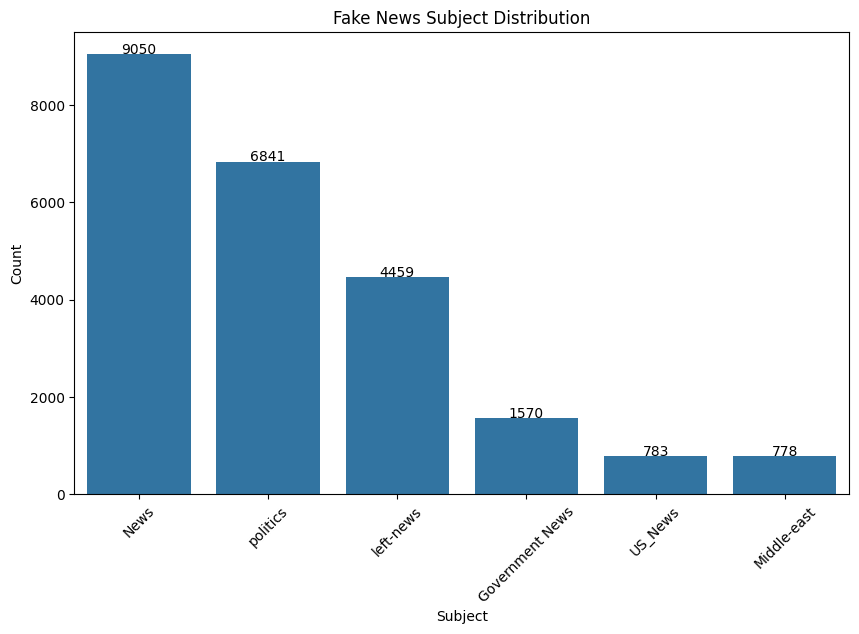

In [7]:
subject_counts = Fake['subject'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=subject_counts.index, y=subject_counts.values)
plt.title('Fake News Subject Distribution')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
for index, value in enumerate(subject_counts):
    plt.text(index, value + 10, str(value), ha='center')

plt.show()

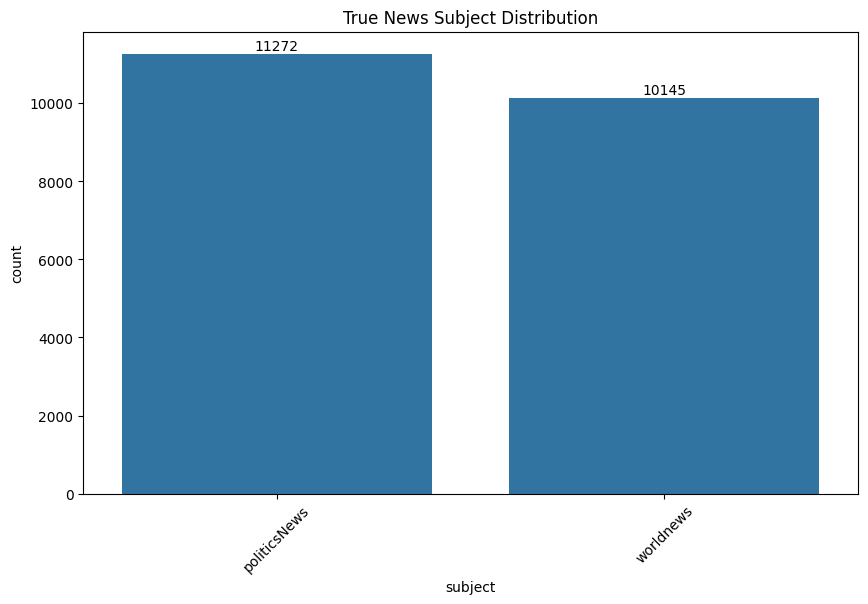

In [8]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=true, x='subject')
plt.title('True News Subject Distribution')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

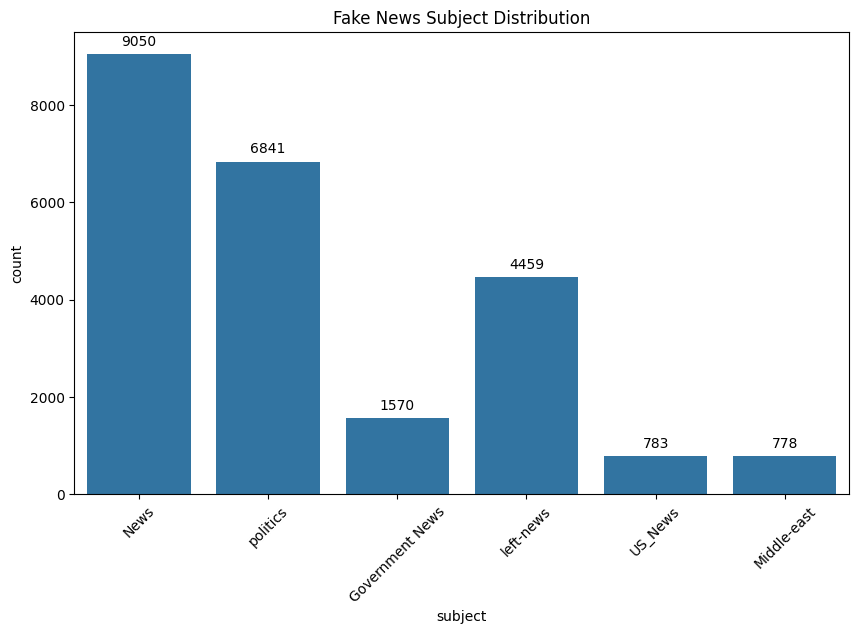

In [9]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=Fake, x='subject')
plt.title('Fake News Subject Distribution')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

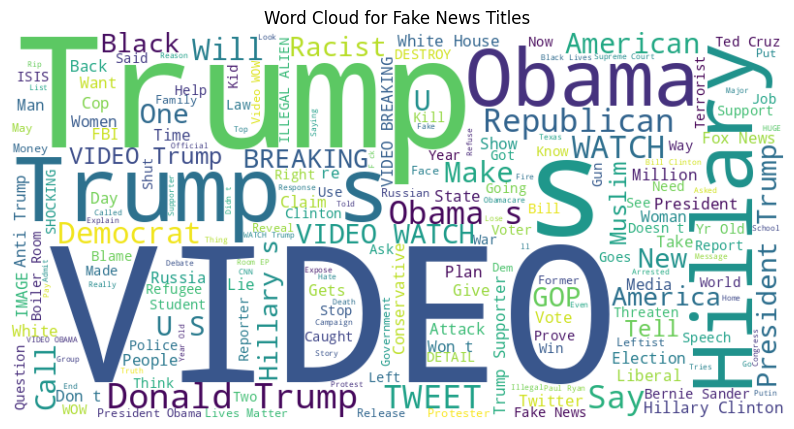

In [10]:
fake_titles = ' '.join(Fake['title'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake News Titles')
plt.axis('off')
plt.show()

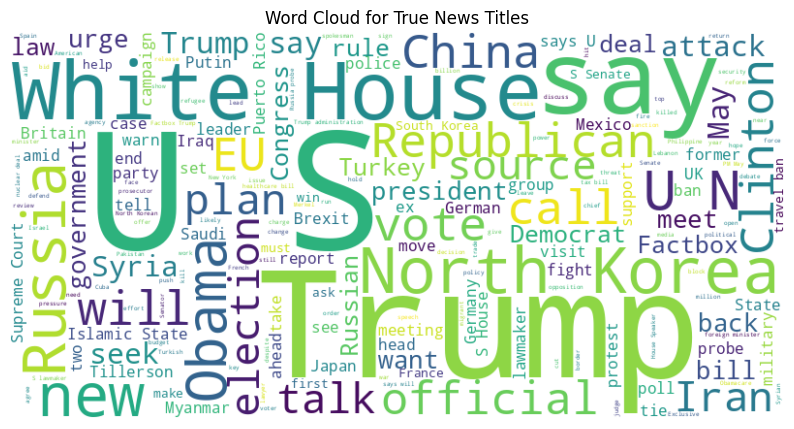

In [11]:
true_titles = ' '.join(true['title'])
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.title('Word Cloud for True News Titles')
plt.axis('off')
plt.show()

## Delete unneeded columns

In [12]:
Fake.drop(columns=["title","date","subject"],inplace=True)
true.drop(columns=["title","date","subject"],inplace=True)

## Concat two dataframe works

In [13]:
News=pd.concat([Fake,true],ignore_index=True)
News

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [14]:
News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [15]:
News.duplicated().sum()

np.int64(6251)

In [16]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet', "/kaggle/working/nltk_data/")
nltk.download('omw-1.4', "/kaggle/working/nltk_data/")
! unzip /kaggle/working/nltk_data/corpora/wordnet.zip -d /kaggle/working/nltk_data/corpora
! unzip /kaggle/working/nltk_data/corpora/omw-1.4.zip -d /kaggle/working/nltk_data/corpora
nltk.data.path.append("/kaggle/working/nltk_data/")

[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data/...


Archive:  /kaggle/working/nltk_data/corpora/wordnet.zip
   creating: /kaggle/working/nltk_data/corpora/wordnet/
  inflating: /kaggle/working/nltk_data/corpora/wordnet/lexnames  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adv  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.adj  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adj  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/README  
  inflating: /kaggle/w

In [17]:
def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    text = re.sub(r'\W', ' ', str(text))

    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    text = text.lower()

    words = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stop_words = set(stopwords.words("english"))
    Words = [word for word in words if word not in stop_words]

    Words = [word for word in Words if len(word) > 3]

    indices = np.unique(Words, return_index=True)[1]
    cleaned_text = np.array(Words)[np.sort(indices)].tolist()

    return cleaned_text

In [18]:
x=News.drop('label',axis=1)
y=News.label

In [19]:
texts=list(x['text'])

In [21]:
nltk.download('punkt_tab')
nltk.download('stopwords')

cleaned_text = [process_text(text) for text in texts]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
print(cleaned_text[:10])

[['donald', 'trump', 'wish', 'american', 'happy', 'year', 'leave', 'instead', 'give', 'shout', 'enemy', 'hater', 'dishonest', 'fake', 'news', 'medium', 'former', 'reality', 'show', 'star', 'country', 'rapidly', 'grows', 'stronger', 'smarter', 'want', 'friend', 'supporter', 'even', 'healthy', 'president', 'angry', 'pant', 'tweeted', 'great', 'america', 'realdonaldtrump', 'december', 'tweet', 'went', 'welll', 'expect', 'kind', 'sends', 'greeting', 'like', 'despicable', 'petty', 'infantile', 'gibberish', 'lack', 'decency', 'allow', 'rise', 'gutter', 'long', 'enough', 'citizen', 'bishop', 'talbert', 'swan', 'talbertswan', 'calvin', 'calvinstowell', 'impeachment', 'would', 'make', 'also', 'accept', 'regaining', 'control', 'congress', 'miranda', 'yaver', 'mirandayaver', 'hear', 'talk', 'include', 'many', 'people', 'hate', 'wonder', 'alan', 'sandoval', 'alansandoval', 'word', 'marlene', 'koren', 'pollitt', 'korencarpenter', 'including', 'fought', 'lost', 'badly', 'know', 'love', 'nothing', 'd

# 3. Tokenize the dataset after splitting Dataset into train and test

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_text, y, test_size=0.2, random_state=42)

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_idx = tokenizer.word_index
v = len(word_idx)
print("the size of vocab =", v)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


the size of vocab = 93252


- make each sentence has lengthe 150 if te sentence s less than this length we fill it with zeros , if iit is bigger we remove the rest of the sentnces:

In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 200
X_train = pad_sequences(X_train,maxlen=maxlen)
X_test = pad_sequences(X_test,maxlen=maxlen)

In [26]:
y.value_counts()

,count
label,
0,23481
1,21417


# 4. Train the model

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

EMBED_DIM = 100
LSTM_UNITS = 150
HIDDEN_DIM = 64
DROPOUT_RATE = 0.5
NUM_CLASSES = 2
LEARNING_RATE = 1e-4
EPOCHS = 15

In [28]:
def build_text_classifier(vocab_size, sequence_len):
    input_layer = Input(shape=(sequence_len,), name="Input_Sequence")
    x = Embedding(input_dim=vocab_size + 1, output_dim=EMBED_DIM, name="Embedding_Layer")(input_layer)
    x = Dropout(DROPOUT_RATE, name="Dropout_1")(x)
    x = LSTM(LSTM_UNITS, return_sequences=True, name="LSTM_Layer")(x)
    x = Dropout(DROPOUT_RATE, name="Dropout_2")(x)
    x = GlobalMaxPooling1D(name="GlobalMaxPool")(x)
    x = Dense(HIDDEN_DIM, activation='relu', name="Dense_Hidden")(x)
    x = Dropout(DROPOUT_RATE, name="Dropout_3")(x)
    output_layer = Dense(NUM_CLASSES, activation='softmax', name="Output_Layer")(x)

    model = Model(inputs=input_layer, outputs=output_layer, name="Custom_TextClassifier")
    return model

In [29]:
model = build_text_classifier(vocab_size=v, sequence_len=maxlen)
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)
y_train_oh = tf.keras.utils.to_categorical(y_train_enc)
y_test_oh = tf.keras.utils.to_categorical(y_test_enc)

history = model.fit(X_train, y_train_oh,
                    epochs=EPOCHS,
                    validation_data=(X_test, y_test_oh),
                    verbose=2)

Epoch 1/15
1123/1123 - 24s - 21ms/step - accuracy: 0.8336 - loss: 0.3321 - val_accuracy: 0.9742 - val_loss: 0.1525
Epoch 2/15
1123/1123 - 19s - 17ms/step - accuracy: 0.9837 - loss: 0.0569 - val_accuracy: 0.9872 - val_loss: 0.0788
Epoch 3/15
1123/1123 - 22s - 19ms/step - accuracy: 0.9926 - loss: 0.0287 - val_accuracy: 0.9905 - val_loss: 0.0373
Epoch 4/15
1123/1123 - 20s - 17ms/step - accuracy: 0.9959 - loss: 0.0176 - val_accuracy: 0.9916 - val_loss: 0.0329
Epoch 5/15
1123/1123 - 20s - 18ms/step - accuracy: 0.9982 - loss: 0.0084 - val_accuracy: 0.9921 - val_loss: 0.0265
Epoch 6/15
1123/1123 - 20s - 17ms/step - accuracy: 0.9982 - loss: 0.0081 - val_accuracy: 0.9928 - val_loss: 0.0357
Epoch 7/15
1123/1123 - 19s - 17ms/step - accuracy: 0.9992 - loss: 0.0036 - val_accuracy: 0.9924 - val_loss: 0.0277
Epoch 8/15
1123/1123 - 21s - 18ms/step - accuracy: 0.9989 - loss: 0.0043 - val_accuracy: 0.9923 - val_loss: 0.0288
Epoch 9/15
1123/1123 - 19s - 17ms/step - accuracy: 0.9989 - loss: 0.0049 - val_a

In [30]:
def plot_metric(history, metric_name):
    plt.figure(figsize=(6, 4))
    plt.plot(history.history[metric_name], label=f"Train {metric_name}")
    plt.plot(history.history[f"val_{metric_name}"], label=f"Val {metric_name}")
    plt.title(f"{metric_name.capitalize()} Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel(metric_name.capitalize())
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

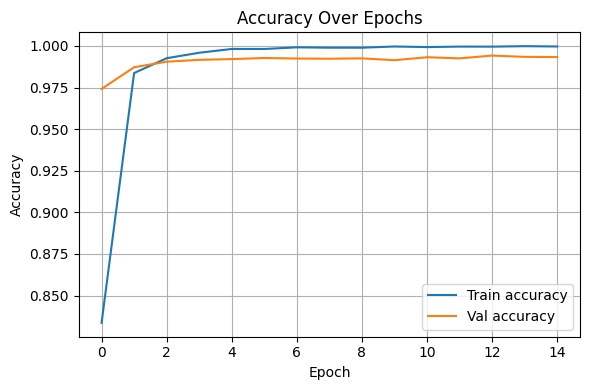

In [31]:
plot_metric(history, 'accuracy')

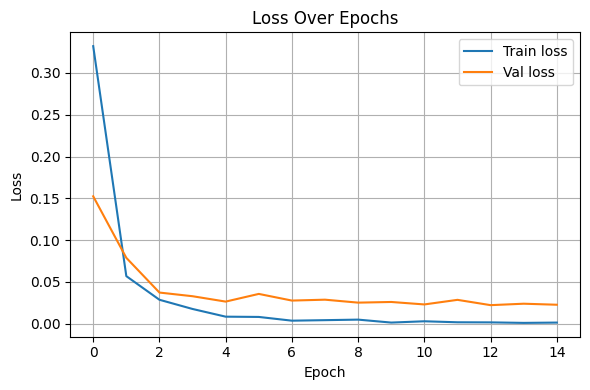

In [32]:
plot_metric(history, 'loss')

# 5. Evaluation

In [38]:
loss, accuracy = model.evaluate(X_test, y_test_one_hot)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9760 - loss: 0.1860
Test Loss: 0.1880376935005188
Test Accuracy: 0.975278377532959


281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


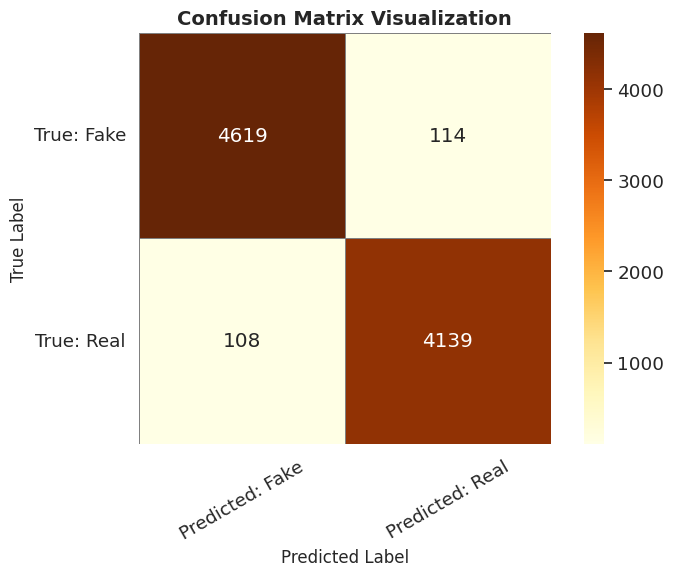

In [40]:
from sklearn.metrics import confusion_matrix

y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)

conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2, style='whitegrid')
cmap = sns.color_palette("YlOrBr", as_cmap=True)

ax = sns.heatmap(conf_matrix,
                 annot=True,
                 fmt='d',
                 cmap=cmap,
                 linewidths=0.5,
                 linecolor='gray',
                 square=True,
                 xticklabels=['Predicted: Fake', 'Predicted: Real'],
                 yticklabels=['True: Fake', 'True: Real'])

ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
ax.set_title('Confusion Matrix Visualization', fontsize=14, weight='bold')
plt.xticks(rotation=30)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()